<a href="https://colab.research.google.com/github/chandradutta/CS23M021_A1/blob/master/DeepLearning_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing wandb
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project='DL_Assignment_1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chandraduttamamidi (cs23m021). Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 1s 0us/step


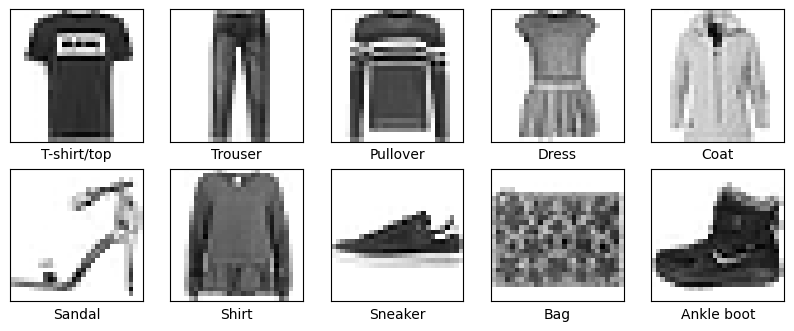

In [2]:
# import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# wandb.init(project="fashion-mnist-sample-images")

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
# print (len(train_images[0]))


# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    idx = next(idx for idx, label in enumerate(y_train) if label == i)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    # wandb.log({f"example_{class_names[i]}": [wandb.Image(x_train[idx], caption=class_names[i])]})

# wandb.finish()

In [3]:
import numpy as np

# def sigmoid(z):
#     clipped_z=np.clip(z,-500, 500)
#     # return 1 / (1 + np.exp(-clipped_z))
def softmax(z):
    # z=np.clip(z,-500,500)
    eps = 1e-6
    return (np.exp(z-max(z)) / (sum(np.exp(z-max(z))) + eps))
def sigmoid(z):
    clipped_z=np.clip(z,-500, 500)
    return 1 / (1 + np.exp(-clipped_z))
def tanh(z):
  clipped_z = np.clip(z, -50, 50)
  return np.tanh(clipped_z)
def relu(Z):
  A = np.maximum(0,Z)
  return A
#derivatives
def tanh_derivative(z):
  return 1-np.tanh(z)**2
def relu_derivative(z):
  return np.where(z>0,1,0)
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))


#weights initialization

def weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.random.randn(n,1))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.random.randn(n,1))
  ws.append(np.random.randn(10,n))
  bs.append(np.random.randn(10,1))
  return ws,bs

def xavier_weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.zeros((n,1)))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.zeros((n,1)))
  ws.append(np.random.randn(10,n))
  bs.append(np.zeros((10,1)))
  return ws,bs






#forward

def calculate_pre_activation(weights, input_data, biases):
    return np.matmul(weights, input_data) + biases

def apply_activation(pre_activation, activation_function):
    if activation_function == 'sigmoid':
        return sigmoid(pre_activation)
    elif activation_function == 'tanh':
        return tanh(pre_activation)
    else :
        return relu(pre_activation)
def forward(x_train, ws, bs, activationfun, hidLay):
    x = x_train.reshape(784, 1) / 255.0
    pre_act = [0 for i in range(hidLay + 1)]
    activ = [0 for i in range(hidLay + 1)]

    for i in range(hidLay):
        if i == 0:
            pre_act[i] = calculate_pre_activation(ws[i], x, bs[i])
        else:
            pre_act[i] = calculate_pre_activation(ws[i], activ[i - 1], bs[i])

        activ[i] = apply_activation(pre_act[i], activationfun)
        # print(pre_act[i].shape)
        # print(activ[i].shape)
    pre_act[hidLay] = calculate_pre_activation(ws[hidLay], activ[hidLay - 1], bs[hidLay])
    activ[hidLay] = softmax(pre_act[hidLay])
    # print(pre_act[-1].shape)
    # print(activ[-1].shape)
    # prin(1)
    return activ, pre_act

#calculate back propagation

def calculate_gradients(d_a, activation_prev, theta, activationfun):
    d_w = np.matmul(d_a, activation_prev.T)
    d_b = np.copy(d_a)
    return d_w, d_b

def update_d_a(d_a, pre_activation_prev, theta, activationfun):
    d_h_prev = np.matmul(theta.T, d_a)

    if activationfun == 'sigmoid':
        d_a_new = np.multiply(d_h_prev, sigmoid_derivative(pre_activation_prev))
    elif activationfun == 'tanh':
        d_a_new = np.multiply(d_h_prev, tanh_derivative(pre_activation_prev))
    else:
        d_a_new = np.multiply(d_h_prev, relu_derivative(pre_activation_prev))

    return d_a_new



def compute(yt):
  e_l = np.zeros((10, 1))
  e_l[yt] = 1
  return e_l
def backwardPropagation(theta_w, activations, pre_activations, yt, hidLay, x, activationfun, l_fun):
    d_w = [0 for _ in range(hidLay + 1)]
    d_b = [0 for _ in range(hidLay + 1)]
    o_hot=compute(yt)
    if l_fun == 'entropy':
        d_a = -(o_hot - activations[hidLay])
    else:
        d_a = (activations[hidLay] - o_hot) * activations[hidLay] * (1 - activations[hidLay])

    layers = len(theta_w) - 1

    # while layers > 0:
    for layers in range(layers,0,-1):
        d_w[layers], d_b[layers] = calculate_gradients(d_a, activations[layers - 1], theta_w[layers], activationfun)
        d_a = update_d_a(d_a, pre_activations[layers - 1], theta_w[layers], activationfun)
        # layers -= 1

    d_w[0] = np.matmul(d_a, x.T)
    d_b[0] = np.copy(d_a)

    return d_w, d_b




def accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  acc=0
  val=0
  for i in range(54000):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    # print(np.argmax(act[-1]),end=",")
    if(np.argmax(act[-1])==y_train[i]):
     acc=acc+1
    temp=act[-1]
    if(l_fun=="entropy"):
     val=val-np.log(temp[y_train[i]]+(1e-5))
    elif (l_fun=="mean_squared_error"):
     val+=np.sum((y_train[i] -act[-1]) ** 2)
  return (acc/540),val
  # return (acc/540)

def validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  accuracy=0
  val=0
  start_index = int(len(x_train) * 0.1)

  for i in range(start_index, len(x_train)):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    val=val-np.log(temp[y_train[i]]+(1e-5))
  return (accuracy/(int(len(x_train))))*100,val

def accuracy_conf(theta_w,theta_b,x_test,y_test,activationfun,hidLay,l_fun,found,real):
  acc=0
  val=0
  for i in range(54000):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    # print(np.argmax(act[-1]),end=",")
    found.append(np.argmax(act[-1]))
    real.append(y_train[i])
  return found,real





def do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun,hidLay,l_fun):
  for ii in range(max_iterations):

    for xt,yt in zip(x_train,y_train):
      # print(xt.shape)
      activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
      # activations.reverse()
      # print(activations[-1].shape)
      x = xt.reshape(784,1) / 255.0
      gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
      for i in range(len(theta_w)):
        theta_w[i] = theta_w[i] - learning_rate * gradients_weights[i]
        theta_b[i] = theta_b[i] - learning_rate * gradients_biases[i]
    acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    print(acc,loss)
    print(v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc})
    wandb.log({"Train_Loss" : loss})
    wandb.log({"Validation_acc" : v_acc})
    wandb.log({"Validation_loss" : v_loss})
    wandb.log({"epoch" : max_iterations})




def do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(w) for w in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(w) for w in theta_b]
        # print(d_w[0].shape,theta_w[0].shape)
        for xt,yt in zip(x_train,y_train):
            # print(xt.shape)
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if((t%batch_size)==0):
              for i in range(len(theta_w)):
                prev_dw[i] = beta*prev_dw[i] + d_w[i]
                prev_db[i] = beta*prev_db[i] + d_b[i]

                theta_b[i] = theta_b[i] - eta*prev_db[i]
                theta_w[i] = theta_w[i] - eta*prev_dw[i]-weight_decay*theta_w[i]

              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]

            t=t+1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_nag(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        d_wx = [np.zeros_like(w) for w in theta_w]
        d_bx = [np.zeros_like(b) for b in theta_b]
        for xt,yt in zip(x_train,y_train):

            lookahead_weights = [w - beta * prev_dw[i] for i, w in enumerate(theta_w)]
            lookahead_biases = [b - beta * prev_db[i] for i, b in enumerate(theta_b)]
            activations, pre_activations= forward(xt,lookahead_weights,lookahead_biases,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)

            for i in range(len(theta_w)):
              d_w[i] += gradients_weights[i]
              d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:
              for i in range(len(theta_w)):
                prev_dw[i] = beta*prev_dw[i] + d_w[i]
                prev_db[i] = beta*prev_db[i] + d_b[i]

                theta_b[i] = theta_b[i] - eta*prev_db[i]
                theta_w[i] = theta_w[i] - eta*prev_dw[i]
                # d_wx[i] = beta * prev_dw[i] + eta * d_w[i]  # Compute momentum-based gradient for weights
                # d_bx[i] = beta * prev_db[i] + eta * d_b[i]  # Compute momentum-based gradient for biases
                #   # Update weights and biases
                # theta_w[i] -= (d_wx[i])-weight_decay*theta_w[i]
                # theta_b[i] -= d_bx[i]

                # # Update previous gradients for the next iteration
                # prev_dw[i] = d_wx[i]
                # prev_db[i] = d_bx[i]
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    # Initialization
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize squared gradients for weights
    v_db = [np.zeros_like(b) for b in theta_b]  # Initialize squared gradients for biases
    eps = 1e-4  # Small constant to prevent division by zero

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters

            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]

                # v_dw[i] = beta * v_dw[i] + (1 - beta) * gradients_weights[i] ** 2  # RMSprop update for weights
                # v_db[i] = beta * v_db[i] + (1 - beta) * gradients_biases[i] ** 2  # RMSprop update for biases


            if(t%batch_size==0):
              for k in range(len(theta_w)):
                v_dw[k] = (1 - beta) * (d_w[k] ** 2) + beta * v_dw[k]  # RMSprop update for weights
                v_db[k] = (1 - beta) * (d_b[k] ** 2) + beta * v_db[k]
                # Update weights and biases
                theta_w[k] -= (learning_rate*d_w[k])/ (np.sqrt(v_dw[k]) + eps)-weight_decay*theta_w[k]
                theta_b[k] -= (learning_rate*d_b[k])/ (np.sqrt(v_db[k])+ eps)
            t+=1

        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_adam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(w) for w in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(w) for w in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    # t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)/255.0

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:

              # Update biased first moment estimates
              for i in range(len(theta_w)):
                  # print(len(theta_w))
                  m_dw[i] =  (1 - beta1) * d_w[i] +beta1 * m_dw[i] # Update first moment for weights
                  m_db[i] =  (1 - beta1) * d_b[i]+beta1 * m_db[i]   # Update first moment for biases
                  v_dw[i] =  (1 - beta2) * (d_w[i] ** 2)  +beta2 * v_dw[i]  # Update second moment for weights
                  v_db[i] =  (1 - beta2) * (d_b[i] ** 2) +beta2 * v_db[i]  # Update second moment for biases

                  # Correct bias in first moment
                  m_dw_corrected = m_dw[i] / (1 - beta1 ** epoch+1)  # Correct first moment for weights
                  m_db_corrected = m_db[i] / (1 - beta1 ** epoch+1)  # Correct first moment for biases

                  v_dw_corrected = v_dw[i] / (1 - beta2 ** epoch+1) # Correct second moment for weights
                  v_db_corrected = v_db[i] / (1 - beta2 ** epoch+1)  # Correct second moment for biases

                  # Update parameters
                  theta_w[i] -= (eta * m_dw_corrected) / (np.sqrt(v_dw_corrected) + eps)-(weight_decay*theta_w[i]) # Update weights
                  theta_b[i] -= (eta * m_db_corrected)/ (np.sqrt(v_db_corrected) + eps)  # Update biases
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})






def do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(w) for w in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(w) for w in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    # t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)/255.0

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:

              # Update biased first moment estimates
              for i in range(len(theta_w)):
                  # print(len(theta_w))
                  m_dw[i] =  (1 - beta1) * d_w[i] +beta1 * m_dw[i] # Update first moment for weights
                  m_db[i] =  (1 - beta1) * d_b[i]+beta1 * m_db[i]   # Update first moment for biases
                  v_dw[i] =  (1 - beta2) * d_w[i] ** 2  +beta2 * v_dw[i]  # Update second moment for weights
                  v_db[i] =  (1 - beta2) * d_b[i] ** 2 +beta2 * v_db[i]  # Update second moment for biases


                  m_dw_corrected = m_dw[i] / (1 - beta1 ** epoch+1)  # Correct first moment for weights
                  m_db_corrected = m_db[i] / (1 - beta1 ** epoch+1)  # Correct first moment for biases

                  v_dw_corrected = v_dw[i] / (1 - beta2 ** epoch+1) # Correct second moment for weights
                  v_db_corrected = v_db[i] / (1 - beta2 ** epoch+1)  # Correct second moment for biases

                  # sqrt_v_dw = np.sqrt(v_dw_corrected + eps)
                  # sqrt_v_db = np.sqrt(v_db_corrected + eps)
                  # beta1_power = 1 - beta1**(epoch + 1)

                  # # Update weights
                  # update_w = eta / sqrt_v_dw
                  # momentum_w = beta1 * m_dw_corrected + (1 - beta1) * d_w[i] / beta1_power
                  # weight_decay_w = weight_decay * theta_w[i]
                  # theta_w[i] = theta_w[i] - update_w * momentum_w - weight_decay_w

                  # # Update biases
                  # update_b = eta / sqrt_v_db
                  # momentum_b = beta1 * m_db_corrected + (1 - beta1) * d_b[i] / beta1_power
                  # theta_b[i] = theta_b[i] - update_b * momentum_b
                  theta_w[i] = theta_w[i] - (eta / (np.sqrt(v_dw_corrected+eps)))*(beta1 * m_dw_corrected + (1-beta1)*d_w[i]/(1-beta1**(epoch+1))) - (weight_decay * theta_w[i])
                  theta_b[i] = theta_b[i] - (eta / (np.sqrt(v_db_corrected+eps)))*(beta1 * m_db_corrected + (1-beta1)*d_b[i]/(1-beta1**(epoch+1)))
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})
    return theta_w,theta_b




In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [6]:
# def conf_Matrix(max_epochs, hidLay,n, eta,beta1,beta2, batch_size, activationfun,weight_decay,l_fun,theta_w, theta_b):
#   found=[]
#   real=[]
#   w,b=do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun)
#   u,v=accuracy_conf(w,b,x_test,y_test,activationfun,hidLay,l_fun,found,real)
#   conf=confusion_matrix(real,found)
#   plt.figure(figsize=(10,10))
#   sn.heatmap(conf, annot=True, fmt='d',cmap='Oranges',linewidths=2,cbar=True,linecolor='black',
#           xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
#   plt.xlabel("PREDICTED")
#   plt.ylabel("ORIGINAL")
#   plt.title('confusion matrix')
#   plt.savefig('conf_matric_1.png')
#   wandb.log({'conf_matrix':wandb.Image('conf_matric_1.png')})
#   plt.show()

#   import seaborn as sn
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import wandb

def evaluate_model(max_epochs, hidLay, n, eta, beta1, beta2, batch_size, activationfun, weight_decay, l_fun, theta_w, theta_b):
    # Train the model
    found = []
    real = []
    w, b = do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2, weight_decay, activationfun, batch_size, hidLay, l_fun)

    # Evaluate the model
    u, v = accuracy_conf(w, b, x_test, y_test, activationfun, hidLay, l_fun, found, real)

    # Generate confusion matrix
    conf = confusion_matrix(real, found)

    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    sn.heatmap(conf, annot=True, fmt='d', cmap='BuPu', linewidths=2, cbar=True, linecolor='black',
               xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
               yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.xlabel("PREDICTED")
    plt.ylabel("ORIGINAL")
    plt.title('Confusion Matrix')
    plt.savefig('conf_matrix_1.png')

    # Log confusion matrix to wandb
    wandb.log({'conf_matrix': wandb.Image('conf_matrix_1.png')})

    # Show plot
    plt.show()


83.33518518518518 [25313.22454856]
75.10166666666666 [25153.44364096]
84.98518518518519 [22276.17535236]
76.55499999999999 [22121.71486539]
85.95185185185186 [20786.48158039]
77.43166666666667 [20625.88018242]
86.53518518518518 [19794.19182321]
77.96166666666666 [19599.26421358]
86.96111111111111 [18978.98240752]
78.345 [18784.42457399]
87.4037037037037 [18270.05789557]
78.72166666666666 [18070.82413917]
87.76851851851852 [17594.65095673]
79.09166666666667 [17385.37659858]
88.13518518518518 [17028.93885543]
79.42 [16815.33250261]
88.4462962962963 [16556.28426116]
79.71666666666667 [16338.80023864]
88.74814814814815 [16146.95509884]
79.98666666666666 [15925.73480459]


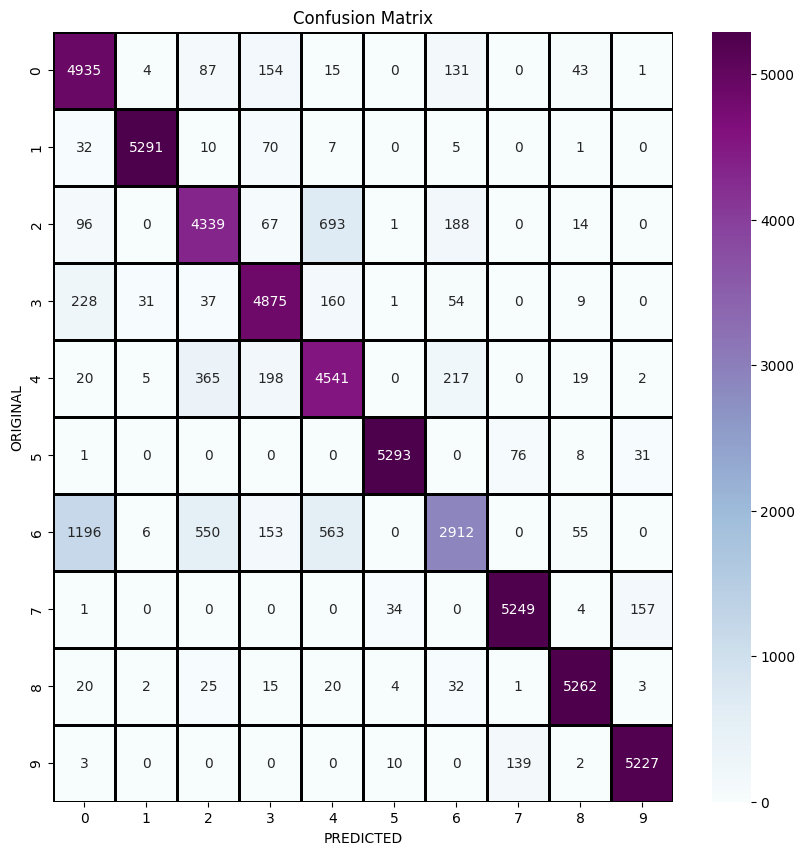

In [8]:
theta_w,theta_b=xavier_weights(3,128)
evaluate_model(10, 3,128, 0.001,0.9,0.999, 32, 'sigmoid',0,'entropy',theta_w, theta_b)

In [ ]:
# hidLay=4
# theta_w,theta_b=weights(hidLay,32)
# max_epochs=5
# eta=0.001
# beta1=0.9
# beta2=0.999
# weight_decay=0
# activationfun='sigmoid'
# batch_size=16
# l_fun='entropy'
# # activations, pre_activations=forward(x_train[1], theta_w, theta_b, 'sigmoid', hidLay)
# # x = x_train[1].reshape(784,1) / 255.0
# # gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,y_train[1],hidLay,x,'sigmoid','entropy')
# # # do_sgd(theta_w,theta_b,x_train,y_train, 0.001, 5,'sigmoid',hidLay,'entropy')
# # do_mgd(5, x_train, y_train, theta_w, theta_b, 0.001, 0.5,0.0005,'sigmoid',64,'entropy',hidLay)
# # do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
# do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun)

In [4]:
def mainfunction(optimization_algorithm,max_epochs, x_train, y_train, theta_w, theta_b,learning_rate, beta,beta1,weight_decay,activationfun,batch_size,l_fun,hidLay):
  if optimization_algorithm == 'mgd':
    do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'ngd':
    do_nag(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'rmsprop':
      do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'adam':
    do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  elif optimization_algorithm == 'nadam':
    do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  else:
    do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_epochs,activationfun,hidLay,l_fun)

def main():
  wandb.init(project="DL_Assignment_1", entity="cs23m021")
  p=wandb.config
  with wandb.init(project='DL_Assignment_1') as run:
    theta_w=[]
    theta_b=[]
    if (p.weightInit=="random"):
      theta_w,theta_b=weights(p.hidLay,p.neurons)
    if (p.weightInit=="xavier"):
      theta_w,theta_b=xavier_weights(p.hidLay,p.neurons)
    mainfunction(p.optimization_algorithm,p.max_epochs,x_train, y_train,theta_w, theta_b,p.learning_rate,0.9,0.99,p.weight_decay,p.activationfun,p.batch_size,p.l_fun,p.hidLay)

parameters_from_sweep = {
    'method' : 'bayes',
    'name'   : 'Accuracy',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'Validation_acc',
    },
    'parameters' : {
        'neurons':{'values':[32,64,128]},
        'optimization_algorithm':{'values':['nadam','adam','rmsprop','sgd','mgd']},
        'max_epochs' : {'values' : [5,10]},
        'hidLay'       : {'values' : [3,4,5]},
        'weight_decay' : {'values' : [0,0.5,0.005] } ,
        'learning_rate' : {'values' : [0.001,0.0001]},
        'weightInit' : {'values': ['random','xavier']},
        'batch_size' : {'values': [16,32,64]},
        'l_fun':{'values':['entropy']},
        'activationfun' : {'values' : ['sigmoid','tanh','relu']}
    }
}

sweepId = wandb.sweep(parameters_from_sweep,project = 'DL_Assignment_1')

wandb.agent(sweepId,function=main,count=5)
# wandb.agent("slbu8ay5",function=main,count=30)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: l0uv8tn2
Sweep URL: https://wandb.ai/cs23m021/DL_Assignment_1/sweeps/l0uv8tn2


wandb: Agent Starting Run: emczr3ap with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: mgd
wandb: 	weightInit: random
wandb: 	weight_decay: 0.5
Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
        self.run()Exception in thread self._target(*self._args, **self._kwargs)
IntMsgThr
  File "/usr/lib/python3.10/threading.py", line 953, in run
:
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 268, in check_network_status
Traceback (most recent call last):
      File "/usr/lib/python3.10/threading.py

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


9.996296296296297 [124352.92523836]
8.986666666666666 [124348.01370374]
9.938888888888888 [124353.15897787]
9.026666666666666 [124347.93757077]
9.938888888888888 [124353.1607474]
9.026666666666666 [124347.93804473]
9.938888888888888 [124353.16052429]
9.026666666666666 [124347.93780051]
9.938888888888888 [124353.16029286]
9.026666666666666 [124347.93755323]


Train_Accuracy,█▁▁▁▁
Train_Loss,▁████
Validation_acc,▁████
Validation_loss,█▁▁▁▁
epoch,▁▃▅▆█
Train_Accuracy,9.93889
Train_Loss,124353.16029
Validation_acc,9.02667
Validation_loss,124347.93755
epoch,4


wandb: Agent Starting Run: og52i18u with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: sgd
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


61.662962962962965 [59622.72915192]
55.528333333333336 [59611.21198335]
67.04444444444445 [48663.46741408]
60.33166666666666 [48643.53475373]
70.0037037037037 [43743.18278112]
63.02166666666666 [43700.13968233]
72.0111111111111 [40688.95355397]
64.85499999999999 [40633.89976232]
73.54444444444445 [38482.37917823]
66.23333333333333 [38427.07070257]
74.70925925925926 [36795.10769037]
67.25833333333333 [36746.01239905]
75.83703703703704 [35469.59460397]
68.27666666666666 [35424.27729795]
76.71111111111111 [34388.99960335]
69.04833333333333 [34342.94330935]
77.41296296296296 [33479.9157903]
69.675 [33430.6584695]
77.97777777777777 [32697.52846464]
70.175 [32644.37424112]


Train_Accuracy,▁▃▅▅▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▁▁▁
Validation_acc,▁▃▅▅▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▁▁▁
epoch,▁▁▁▁▁▁▁▁▁▁
Train_Accuracy,77.97778
Train_Loss,32697.52846
Validation_acc,70.175
Validation_loss,32644.37424
epoch,10


wandb: Agent Starting Run: 775ni0fk with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 3
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 128
wandb: 	optimization_algorithm: rmsprop
wandb: 	weightInit: random
wandb: 	weight_decay: 0.005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


19.17037037037037 [501690.05050654]
17.241666666666667 [501788.37683311]
19.35185185185185 [501384.111225]
17.36 [501776.08537698]
19.36111111111111 [501330.24527729]
17.368333333333332 [501721.6850491]
19.36111111111111 [501330.24527729]
17.368333333333332 [501721.6850491]
19.36111111111111 [501330.24527729]
17.368333333333332 [501721.6850491]


Train_Accuracy,▁████
Train_Loss,█▂▁▁▁
Validation_acc,▁████
Validation_loss,█▇▁▁▁
epoch,▁▃▅▆█
Train_Accuracy,19.36111
Train_Loss,501330.24528
Validation_acc,17.36833
Validation_loss,501721.68505
epoch,4


wandb: Agent Starting Run: 7xh09lyr with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: sgd
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


39.75555555555555 [179850.03399078]
35.80166666666666 [179574.46821856]
49.25370370370371 [106892.38599479]
44.388333333333335 [106358.81804959]
52.987037037037034 [86270.38119723]
47.74 [85869.94890096]
56.02037037037037 [75691.88351933]
50.41 [75328.73894192]
58.93888888888889 [67408.94205887]
53.141666666666666 [67036.66208929]
60.233333333333334 [63150.84521261]
54.23166666666667 [62929.01077393]
61.733333333333334 [59853.75689295]
55.63666666666667 [59585.62351854]
62.237037037037034 [57338.65792657]
56.11333333333334 [57039.81843104]
62.775925925925925 [55994.12498447]
56.59833333333333 [55785.66217181]
63.96296296296296 [54200.19895018]
57.62666666666667 [54047.96662826]


Train_Accuracy,▁▄▅▆▇▇▇███
Train_Loss,█▄▃▂▂▁▁▁▁▁
Validation_acc,▁▄▅▆▇▇▇███
Validation_loss,█▄▃▂▂▁▁▁▁▁
epoch,▁▁▁▁▁▁▁▁▁▁
Train_Accuracy,63.96296
Train_Loss,54200.19895
Validation_acc,57.62667
Validation_loss,54047.96663
epoch,10


wandb: Agent Starting Run: j0nwk2zs with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: rmsprop
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


53.53703703703704 [64848.12010998]
48.17666666666667 [64776.77934223]
56.52037037037037 [58218.61038547]
50.973333333333336 [58143.67949167]
58.46111111111111 [60298.29948827]
52.69833333333334 [60285.48808366]
48.601851851851855 [66142.94330896]
43.76 [66027.42341222]
52.66851851851852 [67930.55712245]
47.276666666666664 [67855.86744344]
49.19444444444444 [65656.32804953]
44.38333333333333 [65495.29469456]
40.2037037037037 [75454.35653566]
36.11666666666667 [75396.21300251]
41.31481481481482 [87756.06782074]
37.09166666666667 [87716.61284414]
32.65555555555556 [75980.36119963]
29.32 [75939.89821248]
35.087037037037035 [82886.61054631]
31.393333333333334 [82850.38934251]


Train_Accuracy,▇▇█▅▆▅▃▃▁▂
Train_Loss,▃▁▁▃▃▃▅█▅▇
Validation_acc,▇▇█▅▆▆▃▃▁▂
Validation_loss,▃▁▂▃▃▃▅█▅▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,35.08704
Train_Loss,82886.61055
Validation_acc,31.39333
Validation_loss,82850.38934
epoch,9


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7d999ae739d0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe